In [7]:
from glob import glob
import os
import pickle as pkl
import zlib
from utils_tbox.utils_tbox import read_pklz
from utils_plots.utils_plots import better_lookin
import pandas as pd
import matplotlib.pyplot as plt

root = "../lightning_logs/tihm/"
all_files = glob(os.path.join(root, "results.pklz"))
print(all_files)
all_data = [read_pklz(fname) for fname in all_files][0]

train_results = pd.DataFrame([thedata[0][0] for thedata in all_data])
train_results.columns = [s.replace("val","train") for s in train_results.columns]

val_results = pd.DataFrame([thedata[1][0] for thedata in all_data])

#test_results = pd.DataFrame([thedata[2][0] for thedata in all_data])
#test_results.columns = [s.replace("val","test") for s in test_results.columns]
#all_results = pd.concat([train_results, val_results, test_results], axis=1)

all_results = pd.concat([train_results, val_results], axis=1)

print(all_results.mean(0))
print(all_results.std(0))

['../lightning_logs/tihm/results.pklz']
f1score/train        0.287862
sensitivity/train    0.829312
specificity/train    0.807659
auprc/train          0.210179
auroc/train          0.856782
f1score/val          0.140974
sensitivity/val      0.685313
specificity/val      0.635102
auprc/val            0.100883
auroc/val            0.696183
dtype: float64
f1score/train        0.031323
sensitivity/train    0.034387
specificity/train    0.037991
auprc/train          0.046289
auroc/train          0.012303
f1score/val          0.051246
sensitivity/val      0.099863
specificity/val      0.070629
auprc/val            0.043315
auroc/val            0.081658
dtype: float64


In [8]:
all_results[["f1score/train","f1score/val"]].mean(0)

f1score/train    0.287862
f1score/val      0.140974
dtype: float64

(0.0, 1.0)

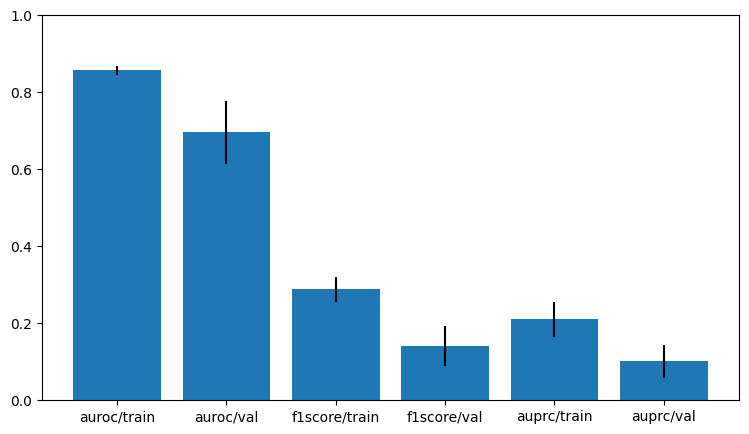

In [20]:
cols=["auroc/train","auroc/val", "f1score/train","f1score/val","auprc/train","auprc/val"]
fig,ax=plt.subplots(figsize=(9,5))
ax.bar(cols, all_results[cols].mean(0).values)
ax.errorbar(cols,all_results[cols].mean(0).values,all_results[cols].std(0).values,ecolor='k',fmt="none")
ax.set_ylim([0,1])

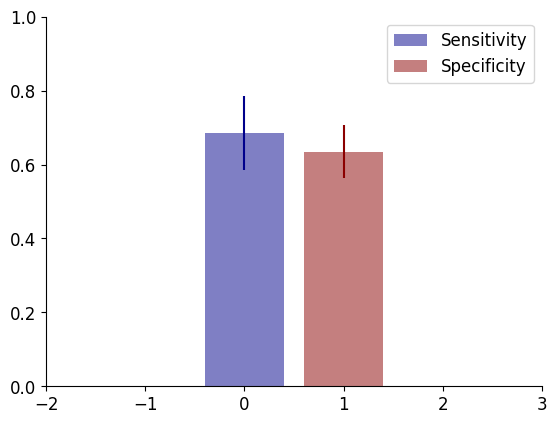

In [17]:
cols=["sensitivity/val", "specificity/val"]
fig,ax=plt.subplots()
#ax.bar(cols, all_results[cols].mean(0).values)
#ax.cla()
ax.bar([0, 1], all_results[cols].mean(0), label=["Sensitivity", "Specificity"], color=["darkblue","darkred"],alpha=0.5)
ax.legend()
ax.set_ylim([0, 1])
ax.set_xlim([-2, 3])

ax.errorbar([0, 1], all_results[cols].mean(0), all_results[cols].std(0).values, ecolor=["darkblue","darkred"],fmt="none")
better_lookin(ax, legend=True, fontsize=12, grid=False)